1. 

En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Elimina del dataframe todas las filas que se correspondan con la clase valor "1". Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario.

Realiza el ejercicio con el nuevo dataframe (eliminando los 1s):

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

# Lectura de Datos

In [49]:
df = pd.read_csv('data/usuarios_win_mac_lin.csv')

In [50]:
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


# EDA

In [51]:
print(f'Tenemos {df.shape[0]} filas y {df.shape[1]} columnas')

Tenemos 170 filas y 5 columnas


In [52]:
df.clase.value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [53]:
df_bi = df[df['clase'].isin([0, 2])]
print(f'Tenemos {df_bi.shape[0]} filas y {df_bi.shape[1]} columnas')

Tenemos 130 filas y 5 columnas


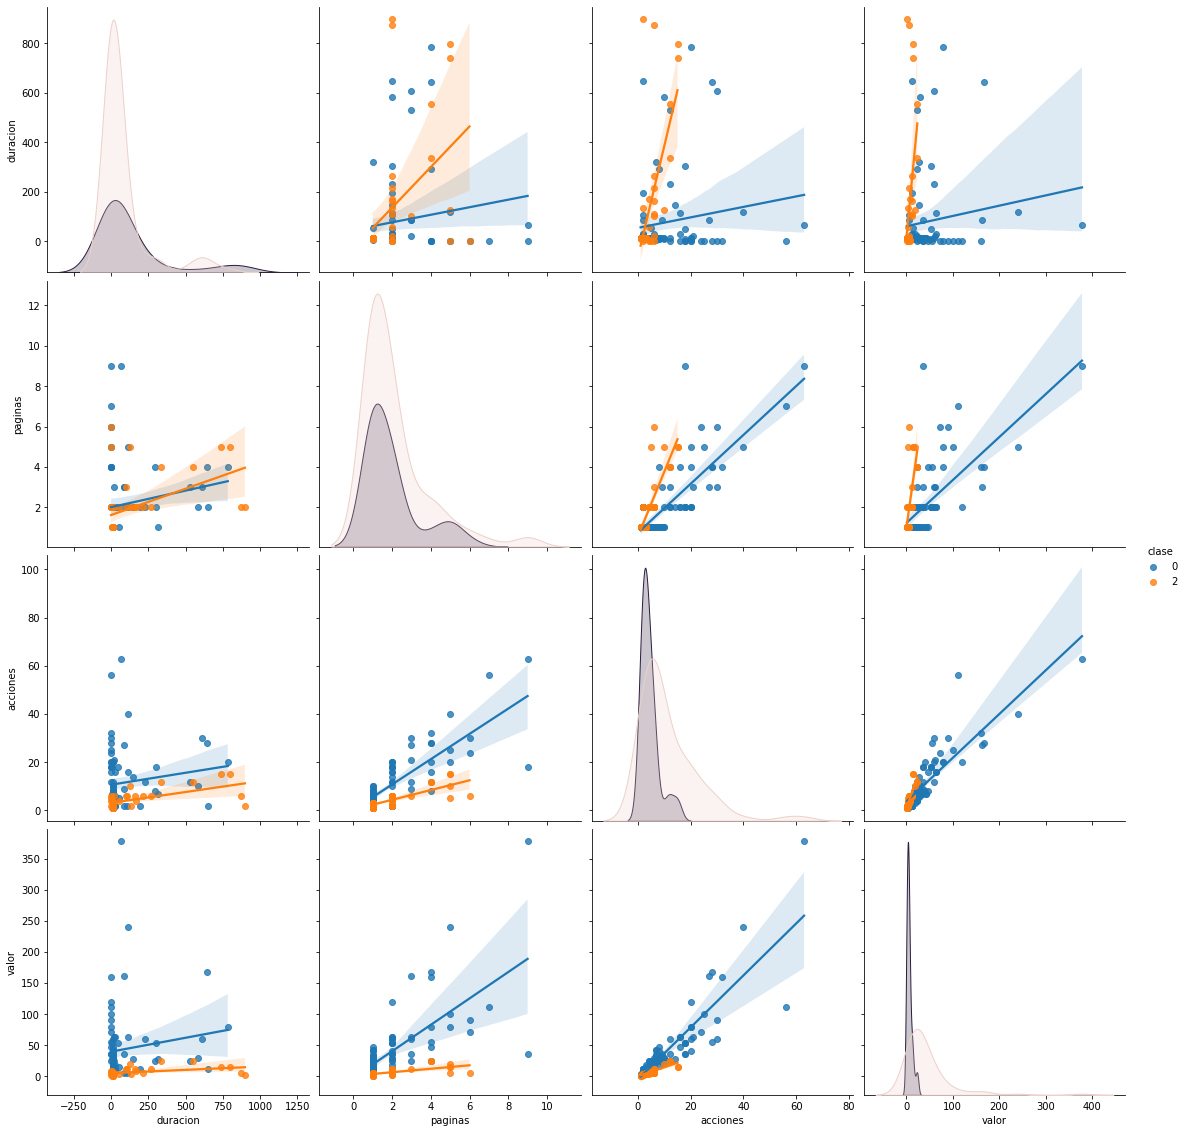

In [54]:
sns.pairplot(df_bi.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

<AxesSubplot:>

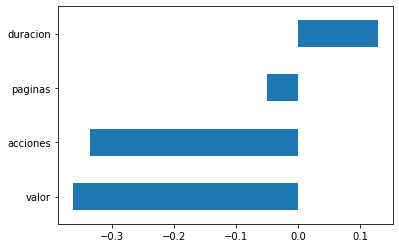

In [55]:
df_bi.corr()['clase'].drop(index='clase').sort_values().plot(kind='barh')

<AxesSubplot:xlabel='clase', ylabel='valor'>

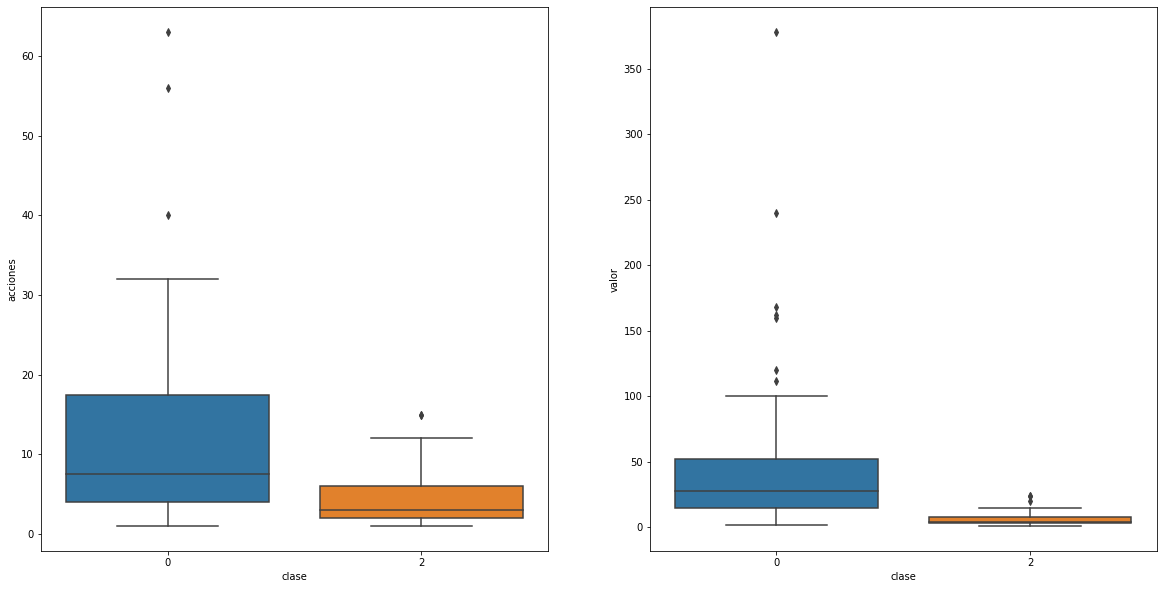

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='clase', y='acciones', data=df_bi, ax=ax[0])
sns.boxplot(x='clase', y='valor', data=df_bi, ax=ax[1])

# Train Test Split

In [57]:
X = df_bi.drop(columns='clase').copy()
y = df_bi['clase']

In [58]:
# Dividimos en Train y Test
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True, 
                                                    test_size=0.15, 
                                                    random_state=0,
                                                    stratify=y)

print(X_train.shape, X_test.shape)


(110, 4) (20, 4)


In [59]:
y_train.value_counts(normalize=True)

0    0.663636
2    0.336364
Name: clase, dtype: float64

In [60]:
y_test.value_counts(normalize=True)

0    0.65
2    0.35
Name: clase, dtype: float64

<AxesSubplot:>

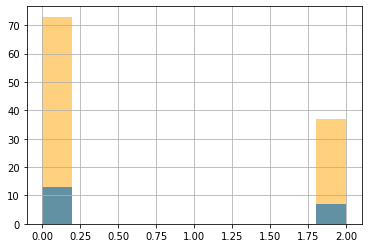

In [61]:
y_train.hist(color='orange', alpha=0.5)
y_test.hist(alpha=0.7)

# Train Model

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_sc, y_train)

y_hat = model.predict(X_test_sc)

In [64]:
y_train.value_counts()

0    73
2    37
Name: clase, dtype: int64

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

acc = accuracy_score(y_true=y_test, y_pred=y_hat)
prec = precision_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
rec = recall_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
f1 = f1_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))

print("ACCURACY: {:.2f}".format(acc))
print("PRECISION: {:.2f}".format(prec))
print("RECALL: {:.2f}".format(rec))
print("F1-SCORE: {:.2f}".format(f1))

ACCURACY: 0.80
PRECISION: 1.00
RECALL: 0.43
F1-SCORE: 0.60


Text(33.0, 0.5, 'REAL')

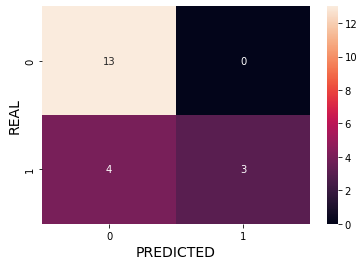

In [19]:
cm = confusion_matrix(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
sns.heatmap(cm, annot=True)
plt.xlabel('PREDICTED', fontsize=14)
plt.ylabel('REAL', fontsize=14)

In [20]:
y_test.value_counts(normalize=True)

0    0.65
2    0.35
Name: clase, dtype: float64

# Feature Engineering

In [21]:
X_train.head()

,duracion,paginas,acciones,valor
60,85.0,2,2,6
112,12.0,1,1,1
37,739.0,5,15,15
141,13.0,1,2,12
51,7.0,1,7,28


<AxesSubplot:>

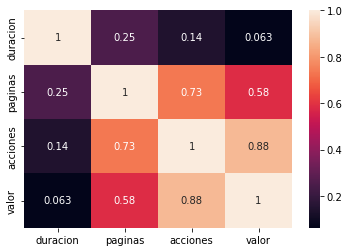

In [22]:
sns.heatmap(X.corr(), annot=True)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train[['valor', 'duracion', 'paginas']])
X_test_sc = sc.transform(X_test[['valor', 'duracion', 'paginas']])

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_sc, y_train)

y_hat = model.predict(X_test_sc)

In [25]:
y_train.value_counts()

0    73
2    37
Name: clase, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

acc = accuracy_score(y_true=y_test, y_pred=y_hat)
prec = precision_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
rec = recall_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
f1 = f1_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))

print("ACCURACY: {:.2f}".format(acc))
print("PRECISION: {:.2f}".format(prec))
print("RECALL: {:.2f}".format(rec))
print("F1-SCORE: {:.2f}".format(f1))

ACCURACY: 0.80
PRECISION: 1.00
RECALL: 0.43
F1-SCORE: 0.60


Text(33.0, 0.5, 'REAL')

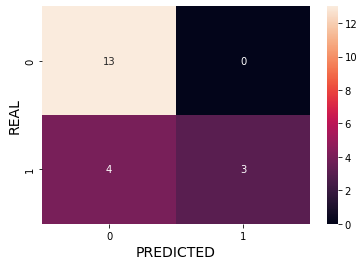

In [27]:
cm = confusion_matrix(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
sns.heatmap(cm, annot=True)
plt.xlabel('PREDICTED', fontsize=14)
plt.ylabel('REAL', fontsize=14)

## CV Score

In [28]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train[['valor', 'duracion', 'paginas']])
X_test_sc = sc.transform(X_test[['valor', 'duracion', 'paginas']])

model = LogisticRegression()
model.fit(X_train_sc, y_train)

y_hat = model.predict(X_test_sc)
y_train.value_counts()

0    73
2    37
Name: clase, dtype: int64

In [29]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(5)

In [30]:
acc = cross_val_score(model, X_train_sc, y_train, scoring='accuracy', cv=kf)
prec = cross_val_score(model, X_train_sc, np.where(y_train == 2, 1, y_train), scoring='precision', cv=kf)
rec = cross_val_score(model, X_train_sc, np.where(y_train == 2, 1, y_train), scoring='recall', cv=kf)
f1 = cross_val_score(model, X_train_sc, np.where(y_train == 2, 1, y_train), scoring='f1')

print("ACCURACY: {:.2f}+-{:.2f}".format(acc.mean(), acc.std()))
print("PRECISION: {:.2f}+-{:.2f}".format(prec.mean(), prec.std()))
print("RECALL: {:.2f}+-{:.2f}".format(rec.mean(), rec.std()))
print("F1-SCORE: {:.2f}+-{:.2f}".format(f1.mean(), f1.std()))

# cm = confusion_matrix(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
# sns.heatmap(cm, annot=True)
# plt.xlabel('PREDICTED', fontsize=14)
# plt.ylabel('REAL', fontsize=14)

ACCURACY: 0.81+-0.09
PRECISION: 0.74+-0.13
RECALL: 0.68+-0.16
F1-SCORE: 0.70+-0.14


In [31]:
cross_val_score(model, X_train_sc, np.where(y_train == 2, 1, y_train), scoring='precision').mean()

0.7406349206349205

In [32]:
rec

array([0.85714286, 0.85714286, 0.42857143, 0.625     , 0.625     ])

# Hyperparameter Tuning

In [33]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [34]:
10 ** np.linspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [67]:
# Escalamos el train y el test
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train[['valor', 'duracion', 'paginas']])
X_test_sc = sc.transform(X_test[['valor', 'duracion', 'paginas']])

model = LogisticRegression(random_state=0)
# model.fit(X_train_sc, y_train)

# y_hat = model.predict(X_test_sc)

kf = StratifiedKFold(5)

param_grid = {'penalty' : ['l1', 'l2'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear']}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param_grid = param_grid, cv = kf, verbose=True, n_jobs=-1, scoring='f1')
clf.fit(X_train_sc, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=True)

In [68]:
model_cv = clf.best_estimator_
y_hat = model_cv.predict(X_test_sc)

acc = cross_val_score(model_cv, X_train_sc, y_train, scoring='accuracy', cv=kf)
prec = cross_val_score(model_cv, X_train_sc, np.where(y_train == 2, 1, y_train), scoring='precision', cv=kf)
rec = cross_val_score(model_cv, X_train_sc, np.where(y_train == 2, 1, y_train), scoring='recall', cv=kf)
f1 = cross_val_score(model_cv, X_train_sc, np.where(y_train == 2, 1, y_train), scoring='f1')

print("ACCURACY: {:.2f}+-{:.2f}".format(acc.mean(), acc.std()))
print("PRECISION: {:.2f}+-{:.2f}".format(prec.mean(), prec.std()))
print("RECALL: {:.2f}+-{:.2f}".format(rec.mean(), rec.std()))
print("F1-SCORE: {:.2f}+-{:.2f}".format(f1.mean(), f1.std()))


ACCURACY: 0.66+-0.02
PRECISION: 0.00+-0.00
RECALL: 0.00+-0.00
F1-SCORE: 0.00+-0.00


c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Pr

In [69]:
############# TEST ###################
acc = accuracy_score(y_true=y_test, y_pred=y_hat)
prec = precision_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
rec = recall_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
f1 = f1_score(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))

print("ACCURACY: {:.2f}".format(acc))
print("PRECISION: {:.2f}".format(prec))
print("RECALL: {:.2f}".format(rec))
print("F1-SCORE: {:.2f}".format(f1))

ACCURACY: 0.65
PRECISION: 0.00
RECALL: 0.00
F1-SCORE: 0.00


c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'REAL')

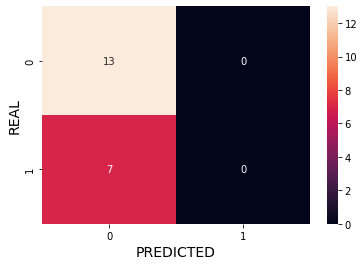

In [70]:
cm = confusion_matrix(y_true=np.where(y_test == 2, 1, y_test), y_pred=np.where(y_hat == 2, 1, y_hat))
sns.heatmap(cm, annot=True)
plt.xlabel('PREDICTED', fontsize=14)
plt.ylabel('REAL', fontsize=14)